In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [93]:
# dane do nauki to wyniki na rok 2018
# dane to testowania to wyniki na rok 2019

# data source - https://www.kaggle.com/datasets/sougatapramanick/happiness-index-2018-2019?select=2018.csv

In [3]:
df= pd.read_csv("data/2018.csv") # dane do nauki
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [5]:
df.set_index("Overall rank", inplace=True) # indexing with Overall rank

In [8]:
df.isnull().sum() # checking undefined values

Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Visualization

In [24]:
dict(df["Country or region"])

{1: 'Finland',
 2: 'Norway',
 3: 'Denmark',
 4: 'Iceland',
 5: 'Switzerland',
 6: 'Netherlands',
 7: 'Canada',
 8: 'New Zealand',
 9: 'Sweden',
 10: 'Australia',
 11: 'United Kingdom',
 12: 'Austria',
 13: 'Costa Rica',
 14: 'Ireland',
 15: 'Germany',
 16: 'Belgium',
 17: 'Luxembourg',
 18: 'United States',
 19: 'Israel',
 20: 'United Arab Emirates',
 21: 'Czech Republic',
 22: 'Malta',
 23: 'France',
 24: 'Mexico',
 25: 'Chile',
 26: 'Taiwan',
 27: 'Panama',
 28: 'Brazil',
 29: 'Argentina',
 30: 'Guatemala',
 31: 'Uruguay',
 32: 'Qatar',
 33: 'Saudi Arabia',
 34: 'Singapore',
 35: 'Malaysia',
 36: 'Spain',
 37: 'Colombia',
 38: 'Trinidad & Tobago',
 39: 'Slovakia',
 40: 'El Salvador',
 41: 'Nicaragua',
 42: 'Poland',
 43: 'Bahrain',
 44: 'Uzbekistan',
 45: 'Kuwait',
 46: 'Thailand',
 47: 'Italy',
 48: 'Ecuador',
 49: 'Belize',
 50: 'Lithuania',
 51: 'Slovenia',
 52: 'Romania',
 53: 'Latvia',
 54: 'Japan',
 55: 'Mauritius',
 56: 'Jamaica',
 57: 'South Korea',
 58: 'Northern Cyprus',
 5

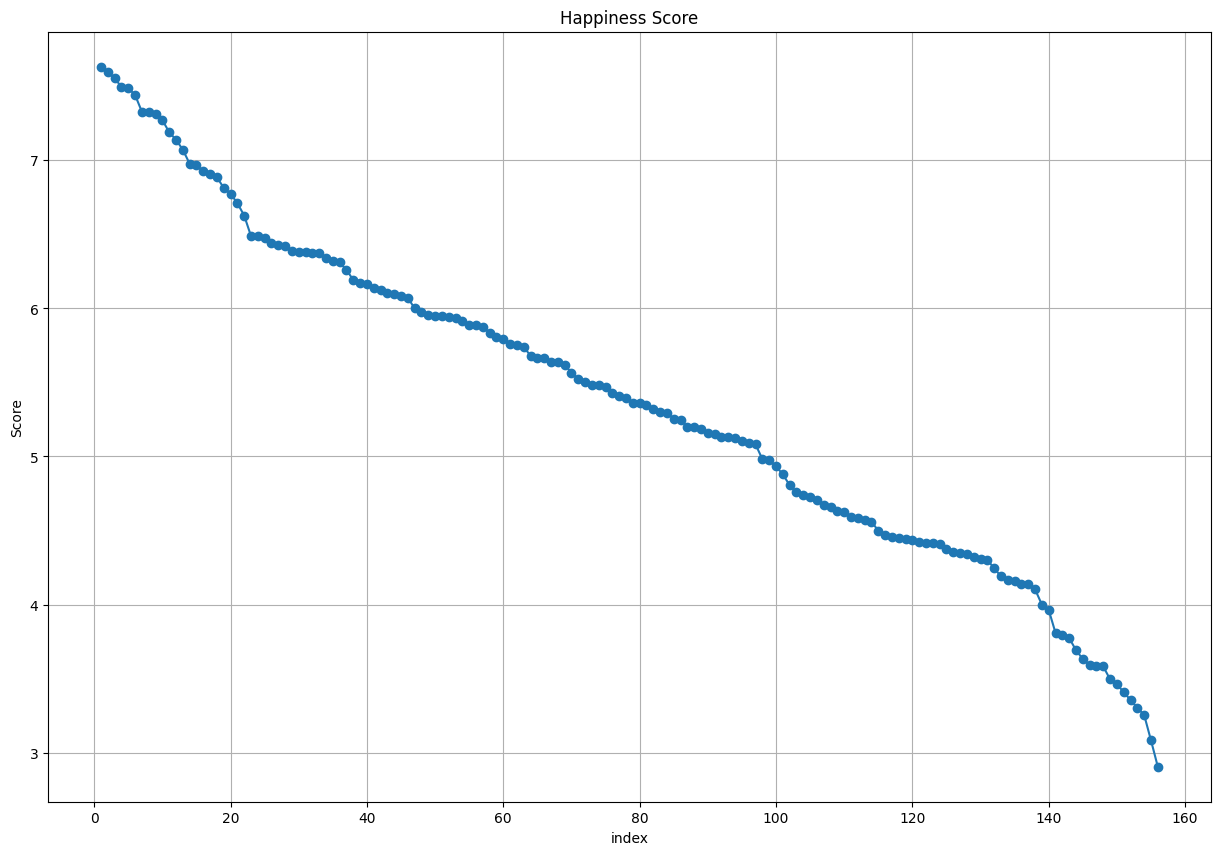

In [39]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df.index, df["Score"], marker="o")
ax.set_title("Happiness Score")
ax.set_xlabel("index")
ax.set_ylabel("Score")
plt.grid(True)

Text(0, 0.5, 'Generosity')

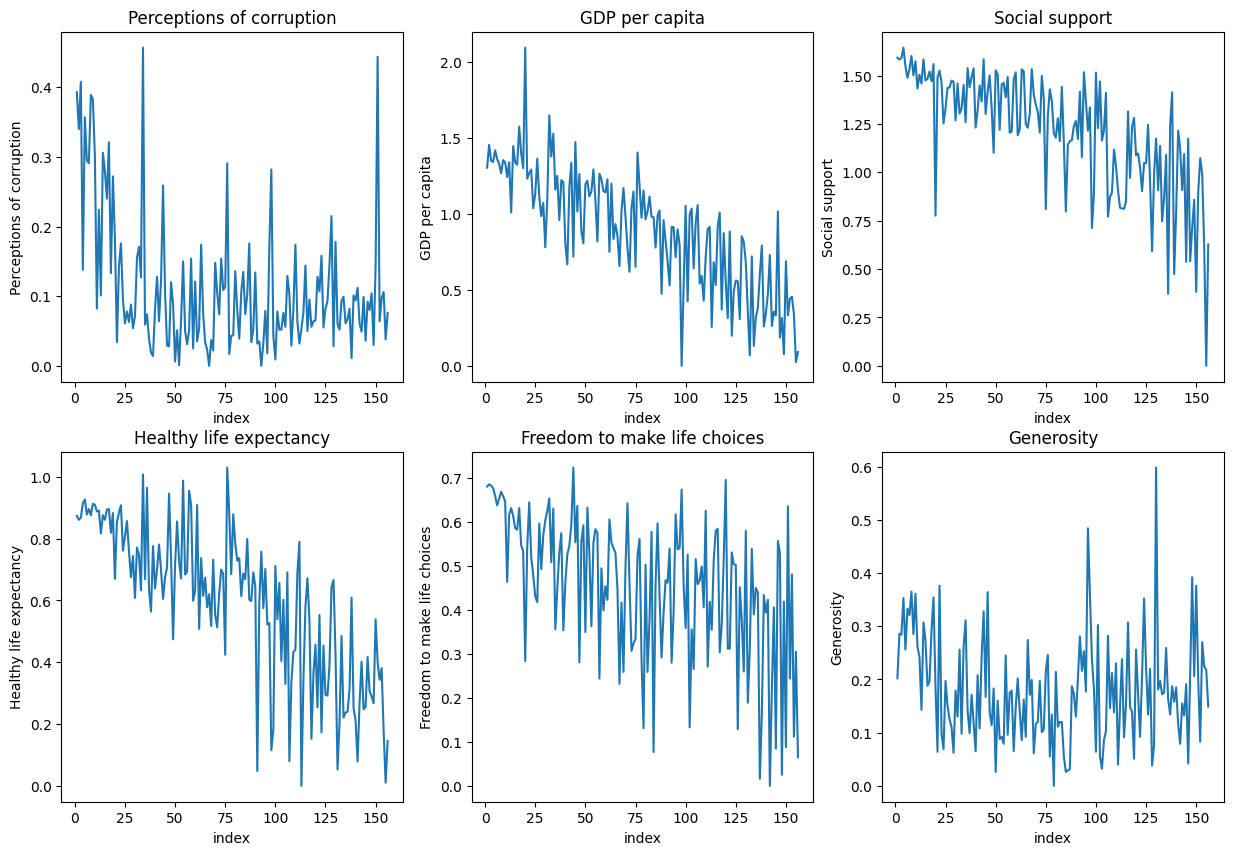

In [35]:
fig, ax = plt.subplots(2,3, figsize=(15, 10))
ax[0][0].plot(df.index, df["Perceptions of corruption"])
ax[0][0].set_title("Perceptions of corruption")
ax[0][0].set_xlabel("index")
ax[0][0].set_ylabel("Perceptions of corruption")

ax[0][1].plot(df.index, df["GDP per capita"])
ax[0][1].set_title("GDP per capita")
ax[0][1].set_xlabel("index")
ax[0][1].set_ylabel("GDP per capita")

ax[0][2].plot(df.index, df["Social support"])
ax[0][2].set_title("Social support")
ax[0][2].set_xlabel("index")
ax[0][2].set_ylabel("Social support")

ax[1][0].plot(df.index, df["Healthy life expectancy"])
ax[1][0].set_title("Healthy life expectancy")
ax[1][0].set_xlabel("index")
ax[1][0].set_ylabel("Healthy life expectancy")

ax[1][1].plot(df.index, df["Freedom to make life choices"])
ax[1][1].set_title("Freedom to make life choices")
ax[1][1].set_xlabel("index")
ax[1][1].set_ylabel("Freedom to make life choices")

ax[1][2].plot(df.index, df["Generosity"])
ax[1][2].set_title("Generosity")
ax[1][2].set_xlabel("index")
ax[1][2].set_ylabel("Generosity")

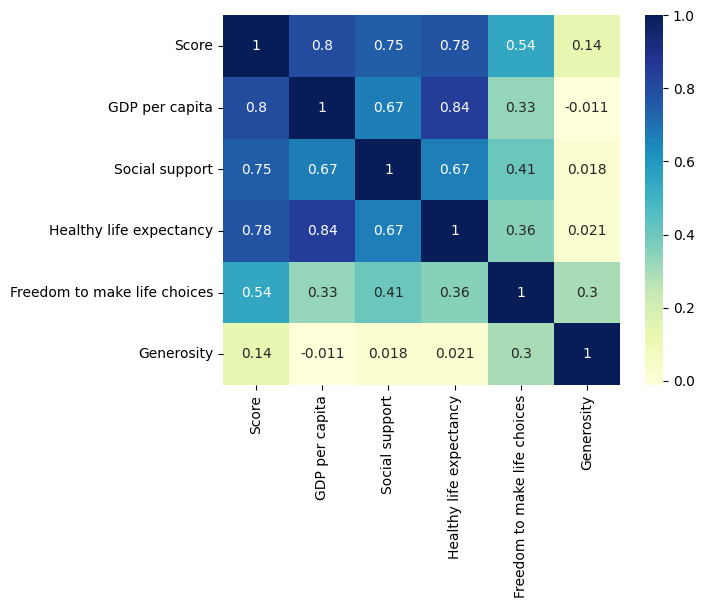

In [46]:
import seaborn as sb
dftest=df[["Score","GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity"]]
dataplot = sb.heatmap(dftest.corr(), cmap="YlGnBu", annot=True)

In [47]:
df.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


Linear regresiion 

In [60]:
# test values
df_test=pd.read_csv("data/2019.csv")
df_test.set_index("Overall rank", inplace=True)
df_test.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,,,
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [69]:
y_test = df_test["Score"]
X_test = df_test.drop(["Score","Country or region"], axis=1)
X_test.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,
1,1.340,1.587,0.986,0.596,0.153,0.393
2,1.383,1.573,0.996,0.592,0.252,0.410
3,1.488,1.582,1.028,0.603,0.271,0.341
4,1.380,1.624,1.026,0.591,0.354,0.118
5,1.396,1.522,0.999,0.557,0.322,0.298


In [82]:
y = df["Score"]
X = df.drop(["Score","Country or region"], axis=1)
X.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,,,,,,
1,1.305,1.592,0.874,0.681,0.202,0.393
2,1.456,1.582,0.861,0.686,0.286,0.340
3,1.351,1.590,0.868,0.683,0.284,0.408
4,1.343,1.644,0.914,0.677,0.353,0.138
5,1.420,1.549,0.927,0.660,0.256,0.357


In [83]:
# linear regression model
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [84]:
model.coef_

array([1.08189104, 1.01733097, 0.82088095, 1.36112301, 0.56470484,
       0.73179778])

In [65]:
y_predicted= model.predict(X_test)

In [68]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [70]:
r2_score(y_test,y_predicted)

0.7758736519459626

In [71]:
mae(y_test,y_predicted)

0.41998446477558826

In [72]:
mse(y_test,y_predicted)

0.27592044653137565

Model 2 with only GDP per capita	Social support	Healthy life expectancy included in model

In [73]:
y = df["Score"]
X = df[["GDP per capita","Social support","Freedom to make life choices"]]
X.head()

,GDP per capita,Social support,Freedom to make life choices
Overall rank,,,
1,1.305,1.592,0.681
2,1.456,1.582,0.686
3,1.351,1.590,0.683
4,1.343,1.644,0.677
5,1.420,1.549,0.660


In [87]:
y2_test = df_test["Score"]
X2_test = df_test[["GDP per capita","Social support","Freedom to make life choices"]]
X_test.head()

,GDP per capita,Social support,Freedom to make life choices
Overall rank,,,
1,1.340,1.587,0.596
2,1.383,1.573,0.592
3,1.488,1.582,0.603
4,1.380,1.624,0.591
5,1.396,1.522,0.557


In [78]:
model_2=LinearRegression()
model_2.fit(X,y)

LinearRegression()

In [79]:
model_2.coef_

array([1.49447822, 1.07752791, 1.72860262])

In [89]:
y2_predicted= model_2.predict(X2_test)

In [90]:
r2_score(y2_test,y2_predicted)

0.7381190015465042

In [91]:
mae(y2_test,y2_predicted)

0.4686340901360366

In [92]:
mse(y2_test,y2_predicted)

0.3223999438653655

In [ ]:
wyniki są porównywalnie dokładne